<a href="https://colab.research.google.com/github/dakshayani2906/Data-Science-Portfolio/blob/main/INN_Hotels_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Target Variable = booking_Status

1. Data Preprocessing
Encode categorical variables (like meal_plan, room_type, market_segment_type, booking_status)

Convert booking_status to binary (0 = Not Canceled, 1 = Canceled)

Check for and handle any outliers or data quality issues

Feature engineering (e.g., total nights = weekend + week nights)

2. Exploratory Data Analysis (EDA)
Understand patterns, correlations, and cancellations

Visualize which features affect cancellation (e.g., lead time, repeated guest, special requests)

3. Train/Test Split
Split into train/test sets (e.g., 80% train, 20% test)

4. Modeling
Try models like:

Logistic Regression

Random Forest

XGBoost

Evaluate using Accuracy, Precision, Recall, AUC-ROC

5. Feature Importance
Use model-based importance to identify top cancellation drivers

6. Business Recommendations
Based on findings (e.g., lead time, cancellation history), suggest cancellation policy updates

In [2]:
# Import Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


In [3]:
# Load the dataset

read = pd.read_csv("INNHotelsGroup.csv")

In [4]:
# Copying data to avoid any changes

df = read.copy()

In [5]:
# Dataset Overview

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
#Understand shape of dataset

df.shape

(36275, 19)

In [7]:
#Check the datatypes of the columns for the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
# Statistical summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [9]:
# Check for missing data

df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [10]:
df.describe(include = ["object"]).T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [11]:
# Checking for duplicate values

df.duplicated().sum()

np.int64(0)

In [12]:
# Check for missing values

df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


Feature Engineering

In [13]:
# Dropping Booking ID

df.drop(["Booking_ID"], axis = 1, inplace = True)

In [14]:
# One - Hot Encode Categorical Variables

categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
# Final Data Summary

print("\nData Types:\n", df.dtypes)
print("\nEncoded Data Preview:\n", df.head())



Data Types:
 no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
type_of_meal_plan_Meal Plan 2              bool
type_of_meal_plan_Meal Plan 3              bool
type_of_meal_plan_Not Selected             bool
room_type_reserved_Room_Type 2             bool
room_type_reserved_Room_Type 3             bool
room_type_reserved_Room_Ty

Exploratory Data Analysis

<Axes: xlabel='booking_status', ylabel='count'>

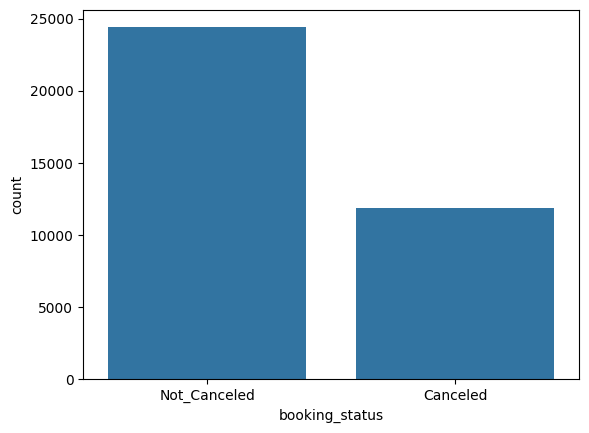

In [16]:
# Plot Target Variable Distribution

sns.countplot(data = df, x= 'booking_status')